In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf
from matplotlib.offsetbox import AnchoredText
from helpers_plot import initPlot, finalizePlot
initPlot()

In [40]:
def term1(a,b):
    result=b*(1+np.exp(-2*a*a/b)-2*np.exp(-a*a/2/b))
    result+=a*np.sqrt(2*np.pi*b)*(erf(np.sqrt(2/b)*a)-erf(a/np.sqrt(2*b)))
    return result

In [41]:
def term2(a,b):
    result=2*np.sqrt(b)*(1+np.exp(-2*a*a/b)-2*np.exp(-a*a/2/b))
    result+=a*np.sqrt(2*np.pi)*(erf(np.sqrt(2/b)*a)-erf(a/np.sqrt(2*b)))
    result*=pow(b, 3./2.)
    return result

In [42]:
def term3(a,b):
    result=-2*a*a*b*b*(-2*np.exp(-2*a*a/b)+np.exp(-a*a/2/b))
    result+=8*b*b*b*(np.exp(-2*a*a/b)-2*np.exp(-a*a/2/b)+1)
    result+=3*a*pow(b,5./2.)*np.sqrt(2*np.pi)*(erf(np.sqrt(2/b)*a)-erf(a/np.sqrt(2*b)))
    return result

In [43]:
thetas=np.array([[2, 2], [2, 4], [2, 8], [2, 16],\
                [4, 4], [4, 8], [4, 16], [8, 8],\
                [8, 16], [16, 16]])
t1s=[]
t2s=[]
t3s=[]
totals=[]
bs=[]
thetaMax=np.linspace(30, 6000)


In [44]:
for i, thetapair in enumerate(thetas):
    theta1=thetapair[0]
    theta2=thetapair[1]
    theta1Rad=theta1*np.pi/180/60
    theta2Rad=theta2*np.pi/180/60
    thetaMaxRad=thetaMax*np.pi/180/60
    
    b=theta1Rad*theta1Rad+theta2Rad*theta2Rad
    t1=term1(thetaMaxRad, b)
    t2=term2(thetaMaxRad, b)
    t3=term3(thetaMaxRad, b)
    
    bs.append(b)
    t1s.append(t1)
    t2s.append(t2)
    t3s.append(t3)
    totals.append(theta1Rad*theta1Rad*theta2Rad*theta2Rad/np.pi/pow(b, 5)*(b*b*t1*t1-2*b*t1*t2+(t3*t1+t2*t2)/4))


Plotting 0


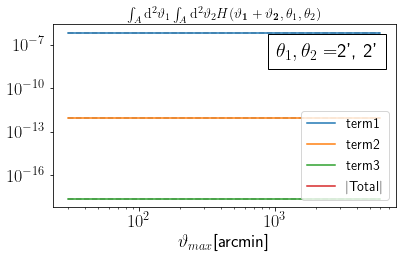

Plotting 1


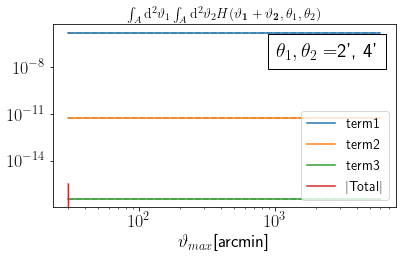

Plotting 2


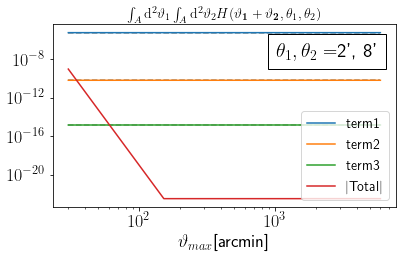

Plotting 3


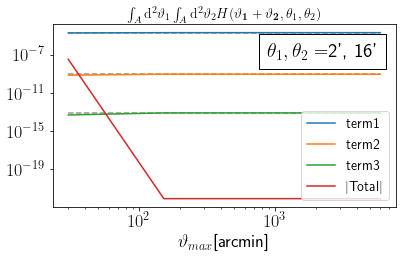

Plotting 4


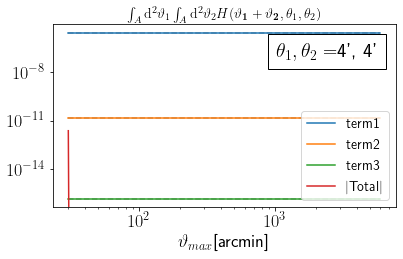

Plotting 5


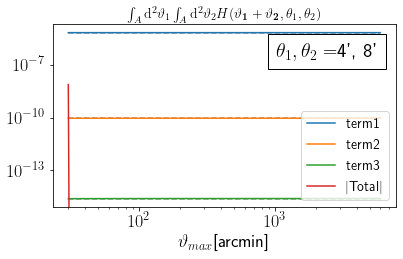

Plotting 6


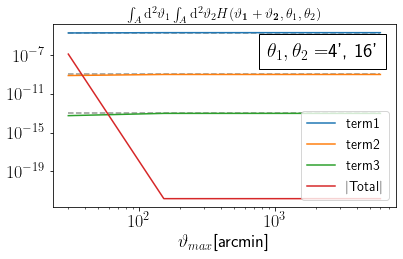

Plotting 7


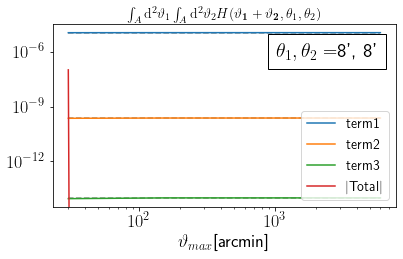

Plotting 8


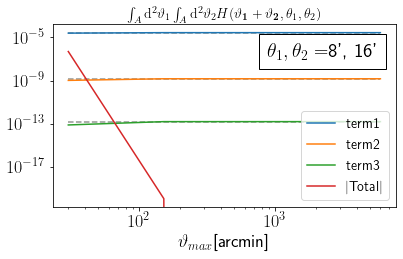

Plotting 9


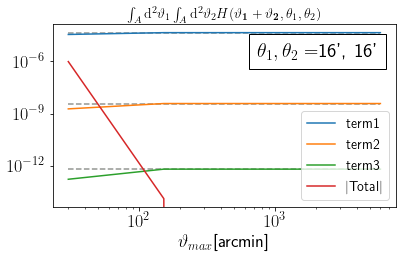

In [45]:
for i, thetapair in enumerate(thetas):
    print(f"Plotting {i}")
    theta1=thetapair[0]
    theta2=thetapair[1]
    b=bs[i]
    fig, ax=plt.subplots(1,1)
    textbox=AnchoredText(r'$\theta_1, \theta_2=$'+f"{theta1}', {theta2}'", loc='upper right')
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.plot(thetaMax, t1s[i], label='term1')
    ax.plot(thetaMax, t2s[i], label='term2')
    ax.plot(thetaMax, t3s[i], label='term3')
    ax.plot(thetaMax, np.abs(totals[i]), label=r'$|$Total$|$')
    ax.hlines([b, 2*b*b, 8*b*b*b], thetaMax[0], thetaMax[-1], color='xkcd:grey', ls='--')
    ax.set_xlabel(r'$\vartheta_{max}$[arcmin]')
    ax.add_artist(textbox)
    finalizePlot(ax, title=r'$\int_A \mathrm{d}^2\vartheta_1 \int_A \mathrm{d}^2\vartheta_2 H(\mathbf{\vartheta_1}+\mathbf{\vartheta_2}, \theta_1, \theta_2)$', \
                outputFn=f'Integral_H_theta1_{theta1}_theta2_{theta2}.png', loc_legend='lower right')

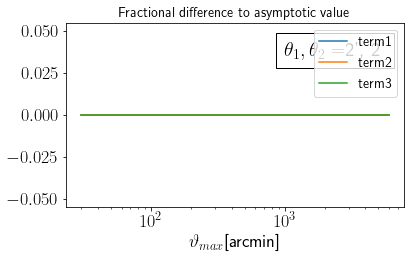

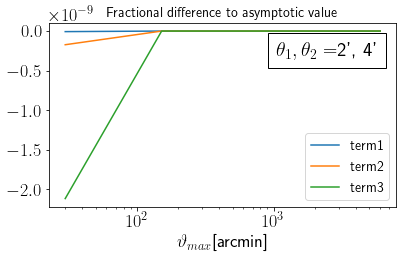

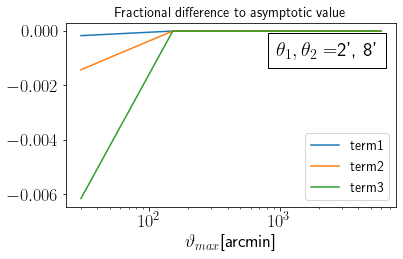

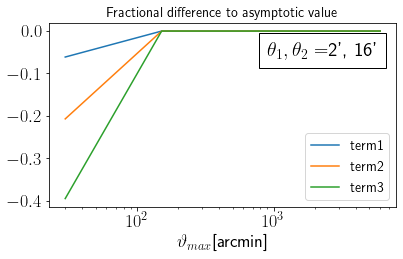

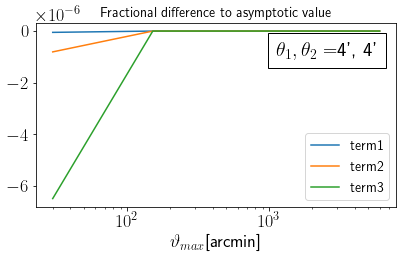

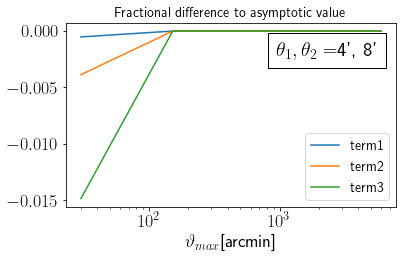

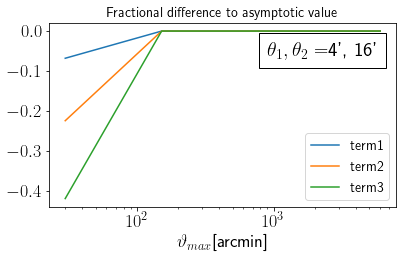

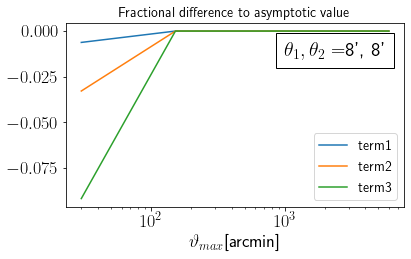

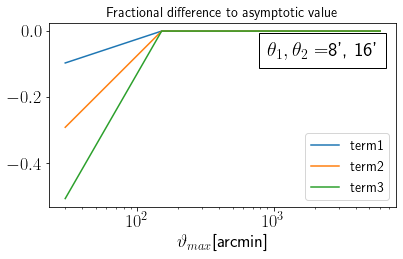

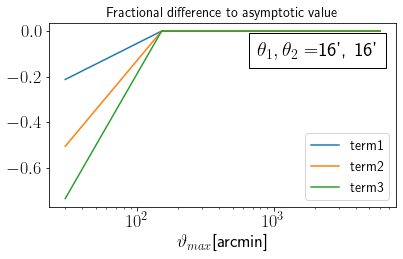

In [46]:
for i, thetapair in enumerate(thetas):
    theta1=thetapair[0]
    theta2=thetapair[1]
    b=bs[i]
    fig, ax=plt.subplots(1,1)
    textbox=AnchoredText(r'$\theta_1, \theta_2=$'+f"{theta1}', {theta2}'", loc='upper right')
    ax.set_xscale('log')
    ax.set_title('Fractional difference to asymptotic value')
    ax.plot(thetaMax, (t1s[i]-b)/b, label=r'$T_1$')
    ax.plot(thetaMax, (t2s[i]-2*b*b)/(2*b*b), label=r'$T_2$')
    ax.plot(thetaMax, (t3s[i]-8*b*b*b)/(8*b*b*b), label=r'$T_3$')
    ax.set_xlabel(r'$\vartheta_{max}$[arcmin]')
    ax.add_artist(textbox)
    finalizePlot(ax, title=r'Fractional difference to asymptotic value', \
                outputFn=f'FracDiff_H_theta1_{theta1}_theta2_{theta2}.png', loc_legend="lower right")